# Pre-processing

In [ ]:
!pip install Sastrawi
!pip install nltk
!pip install demoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 1.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import demoji
import nltk
import re
import string
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
import io
from google.colab import files
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [ ]:
demoji.download_codes()

/tmp/ipython-input-3154655907.py:2: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.
  demoji.download_codes()


In [ ]:
uploaded = files.upload()

Saving gmaps_reviews_full (Lidah Wetan).csv to gmaps_reviews_full (Lidah Wetan).csv


In [ ]:
df_ktt = pd.read_csv('gmaps_reviews_full.csv', sep=',')

df_ktt['review_clean'] = df_ktt['Review'].astype(str).tolist()

for i, text in enumerate(df_ktt['review_clean'], 1):
    print(f"{text}")

Tempat belajar yang real pembelajaran sepanjang hayat, dari sarjana magister doktor sya ada di Surabaya, Unusa Surabaya memang Kereen 💐🙏🏻🙏🏻🙏🏻 …
Salah satu kampus negeri di kota Surabaya dengan jumlah mahasiswa yang banyak, termasuk jumlah kampus nya banyak. Semoga menjadi tempat untuk mencetak mahasiswa yang sukses dunia akhirat.
Minta tolong dong untuk Unesa Ketintang untuk update alamat maps nya...banyak orang  yang salah alamat dan masuk di kampus Tel-u .dari berbagai macam pengiriman  ataupun kegiatan di gedung serbagunanya Unesa sekian terimakasih
Kampus nya maju, lingkungan nya tenang, kuliner nya banyak dan murah sesuai kantong mahasiswa..
Bagus kampus universitas negeri Surabaya luas dan parkiran luas sekali keluar universitas negeri Surabaya menunjukkan STNK kalo tidak punya STNK boleh pakai KTP
Ada nggak ya, tmpat penampungan brg2 hilang....
mungkin STNK motor atau kunci spd motor yg hilang di kampus Unesa Lidah Wetan yg mungkin …
Bangunan kampus yang pertama sekali, namun se

In [ ]:
df_lw = pd.read_csv('gmaps_reviews_full (Lidah Wetan).csv', sep=',')

df_lw['review_clean_lw'] = df_lw['Review'].astype(str).tolist()

for i, text in enumerate(df_lw['review_clean_lw'], 1):
    print(f"{text}")

Kampus daerah Pakuwon, ada lapangan golf mini, jogging track dekat danau kecil, sayang kurang terawat,banyak sampah di tepiannya...
Rektorat UNESA (Universitas Negeri Surabaya) ini pusat administrasi dan kepemimpinan universitas yang sangat prestisius! Sebagai salah satu universitas negeri terbaik di Indonesia, UNESA memiliki reputasi yang kuat dalam bidang pendidikan …
Masyaallah sekian tahun ga ke FIP sekarang cauwantikk apik, adem jos, 1 langkah ke depan
📍 *Universitas Negeri Surabaya – Kampus 2* di Lidah Wetan merupakan salah satu simpul penting dalam penyelenggaraan pendidikan tinggi di Jawa Timur. Kawasan ini menjadi pusat aktivitas akademik mahasiswa dari berbagai jurusan, terutama …
banyak penjual di unesa lidah wetan surabaya tak bersih masak galon rusak di buang 😡🤬 …
Tempat joging nya sangat representatif, cozy dan sejuk
Kampusnya emang luas banget, kyknya paking luas di surabaya ini. Ada danau nya juga buat santai santai. Tempat dekat juga sama mall pakuwon, dekat banget lah

In [ ]:
emoji_pattern = re.compile(
    "["
    "\U0001F600-\U0001F64F"
    "\U0001F300-\U0001F5FF"
    "\U0001F680-\U0001F6FF"
    "\U0001F1E0-\U0001F1FF"
    "\U00002700-\U000027BF"
    "\U0001F900-\U0001F9FF"
    "\U00002600-\U000026FF"
    "\U00002B00-\U00002BFF"
    "\U0001FA70-\U0001FAFF"
    "\U0001F004"
    "\U0001F0CF"
    "\U0000FE0F"
    "\U0001F3FB-\U0001F3FF"
    "]+",
    flags=re.UNICODE
)
#  Menghapus emotikon
def hapus_emot(text):
    tanpa_emot = emoji_pattern.sub('', text)
    tanpa_emot = re.sub(r'[\n\r\t]', ' ', tanpa_emot)
    tanpa_emot = re.sub(r'[\u200b-\u200f\u202a-\u202e]', '', tanpa_emot)
    tanpa_emot = re.sub(r'\s+', ' ', tanpa_emot)
    return tanpa_emot
df_ktt['review_clean'] = [hapus_emot(text) for text in df_ktt['review_clean']]
df_lw['review_clean_lw'] = [hapus_emot(text) for text in df_lw['review_clean_lw']]

# mengubah menjadi huruf kecil
df_ktt['review_clean'] = [text.lower() for text in df_ktt['review_clean']]
df_lw['review_clean_lw'] = [text.lower() for text in df_lw['review_clean_lw']]

# menghapus tanda baca
def hapus_puct(text):
    text = text.translate(str.maketrans('','', string.punctuation))
    text = re.sub(r'\s+', ' ', text)
    return text
df_ktt['review_clean'] = [hapus_puct(text) for text in df_ktt['review_clean']]
df_lw['review_clean_lw'] = [hapus_puct(text) for text in df_lw['review_clean_lw']]

In [ ]:
# Pembenaran kata yang salah ketik / tergabung
# Kata yang salah ketik dan stopword tamabahan
slangdict_ktt = {
    "utk": "untuk", "u": "untuk", "jd": "jadi", "jg": "juga", "dr": "dari",
    "sm": "sama", "sy": "saya", "aq": "aku", "gw": "saya", "gue": "saya",
    "bgt": "banget", "bgd": "banget", "bnyk": "banyak", "bnyak": "banyak",
    "gmn": "gimana", "gmna": "gimana", "knp": "kenapa", "tp": "tapi",
    "gk": "tidak", "ga": "tidak", "nggak": "tidak", "ngga": "tidak",
    "tlong": "tolong", "pls": "tolong", "plis": "tolong",
    "skrg": "sekarang", "bsk": "besok", "kmrn": "kemarin",
    "mksd": "maksud", "blm": "belum", "sdh": "sudah", "udh": "sudah",
    "tdk": "tidak", "ngga": "tidak", "td": "tadi", "trus": "terus",
    "dkt": "dekat", "dlm": "dalam", "kl": "kalau", "klo": "kalau",
    "kalo": "kalau", "kyk": "seperti", "kayak": "seperti",
    "cmn": "cuma", "cuma": "hanya", "sya": "saya", "tmpat": 'tempat',
    "unusa": "unesa", "brg2": "barang barang", "spd" : "sepeda", "yg": "yang",
    "tks":"terima kasih", "mintak":"minta", "ramdhan": "ramadan", "byk": "banyak",
    "krn":"karena","kdang":"kadang","org":"orang","blajar":"belajar", "unversitas": "universitas",
    "fklutas": "fakultas", "mkaanan": "makanan", "pelyanan": "pelayanan", "kmpus":"kampus", "surbya": "surabaya",
    "unsa": "unesa", "tmpt":"tempat", "fasiltas":"fasilitas", "kbrsihan":"kebersihan", "mahasiswa":"mahasiswa",
    "parkiraan":"parkiran", "bangunaan":"bangunan","baaaagus":"bagus","kereeeen":"keren",
    "panasst":"panas","luaaaas":"luas","mantaap":"keren", "bangeet":"banget", "pollll":"banget","sangaat":"sangat",
    "sukaaa":"suka", "juosss":"keren","jos":"keren", "dg":"dengan", "gak":"tidak", "blom":"belum",
    "bbrp":"beberapa","diunesa":"di unesa","keunesa":"ke unesa","kampusini":"kampus ini","suksesdunia":"sukses dunia",
    "kereen":"keren","update":"perbarui","Tel-u":"telkom","real":"nyata","maps":"peta","liwet":"lidah wetan",
    "gedenya":"besar","foodcurt":"tempat makan", "foodcourt":"tempat makan","foodcourt":"tempat makan","dll":"dan lain",
    "haloooo":"halo","kesasar":"tersesat","nyasar":"tersesat","negri":"negeri","lgsg":"langsung","ngetime":"menunggu",
    "lidah":"lidah wetan","dibawah":"di bawah","masjidny":"masjidnya","anabul":"hewan","rate":"nilai",
    "bangettt":"banget","nyamannnn":"nyaman","lagii":"lagi","best":"terbaik","jur":"jurusan","lab":"laboratorium",
    "membludak":"besar","online":"daring","emergency":"darurat","pohon2":"pohon","anakqu":"anak",
    "ngampus":"belajar","fak":"fakultas","areanya":"tempat","offline":"luring","foodcourtkantin":"tempat makan",
    "traffic":"jalan","reebok":"ingat", "sweet":"kenangan", "memory":"indah","lingkung":"lingkungan","food":"tempat makan","courtpujasera":"",
    "sepakbola":"sepak bola","web":"layanan","visa":"bisa","jogging":"lari","karna":"karna", "ragasangat":"olahraga sangat",
    "mantapdosen2":"keren para dosen","bermutubest":"mutu", "moment":"kenangan",
    "pendmatematika":"pendidikan matematika","digodok":"direbus","mantab":"keren","sepibelum":"sepi belum",
    "sepii":"sepi","bispak":"","was":"pernah ada","here":"", "daljab":"dalam jabatan","menu":"makan","levelnya":"tingkat",
    "bravo":"keren","good":"kerja bagus", "job":"","muter":"berputar","tetep":"tetap","gatau":"tidak tau","liwetlidah":"lidah",
    "terimakasih":"terima kasih", "negrimuridnya":"negeri muridnya","sangking":"karena sangat","jawabpake":"jawab pakai",
    "unesahabis":"unesa setelah","kaburkasian":"kabur kasihan","nyabanyak":"banyak","telu":"telkom","diperbaharui":"perbarui",
    "saking":"karena sangat","bangett":"banget","wkwk":"","ojol":"ojek online","mayan":"lumayan","semuatapi":"semua tapi",
    "jawabhabis":"jawab setelah","nabrak":"menabrak","laridimohon":"lari mohon","ramahh":"ramah","the":"","kaya":"seperti",
    "ilkom":"ilmu komunikasi","2300":"malam","99":"banyak yang","mipa":"matematika dan ilmu pengetahuan alam",
    "driver":"ojek online","agak":"sedikit","dgn":"dengan","pepohonan":"banyak pohon","mahasiswai":"mahasiswa",
    "historia07":"sejarah 07","buat":"membuat","kampuss":"kampus","sasing":"sastra inggris","fmipa":"matematika dan ilmu pengetahuan alam",
    "berolah":"","track":"lintasan","ketintangtempatnya":"ketintang tempat","takjil":"makanan berbuka","with":"","friends":"teman",
    "mapnya":"peta","maps":"peta","map":"peta"
}

slangdict_lw = {
    "utk": "untuk", "u": "untuk", "jd": "jadi", "jg": "juga", "dr": "dari",
    "sm": "sama", "sy": "saya", "aq": "aku", "gw": "saya", "gue": "saya",
    "bgt": "banget", "bgd": "banget", "bnyk": "banyak", "bnyak": "banyak",
    "gmn": "gimana", "gmna": "gimana", "knp": "kenapa", "tp": "tapi",
    "gk": "tidak", "ga": "tidak", "nggak": "tidak", "ngga": "tidak",
    "tlong": "tolong", "pls": "tolong", "plis": "tolong",
    "skrg": "sekarang", "bsk": "besok", "kmrn": "kemarin",
    "mksd": "maksud", "blm": "belum", "sdh": "sudah", "udh": "sudah",
    "tdk": "tidak", "ngga": "tidak", "td": "tadi", "trus": "terus",
    "dkt": "dekat", "dlm": "dalam", "kl": "kalau", "klo": "kalau",
    "kalo": "kalau", "kyk": "seperti", "kayak": "seperti",
    "cmn": "cuma", "cuma": "hanya", "sya": "saya", "tmpat": 'tempat',
    "unusa": "unesa", "brg2": "barang barang", "spd" : "sepeda", "yg": "yang",
    "tks":"thanks", "mintak":"minta", "ramdhan": "ramadan", "byk": "banyak",
    "krn":"karena","kdang":"kadang","org":"orang","blajar":"belajar", "cauwantikk":"cantik",
    "jos":"keren","apik":"bagus","adem":"sejuk","tak":"tidak","cozy":"nyaman","kyknya":"kayaknya",
    "paking":"paling","jdi":"jadi","sna":"sana","mudahan":"","pohontp":"pohon tapi","food":"tempat makan", "court":"",
    "mini zoo":"kebun binatang kecil","so on":"soon", "surabayaindonesiayg":"surabaya indonesia yang",
    "surabayaikip":"surabaya ikip","okey":"oke","bs":"bisa","nugas":"mengerjakan tugas","so tasty":"",
    "comfy":"sangat nyaman","maybe":"mungkin","tempata":"tempatnya","n":"dan","rs":"rumah sakit",
    "bbrp":"beberapa","resto":"restoran","mamak":"ibu","view":"pemandangan","jogging":"lari", "track":"lintasan",
    "taglinenya":"sebutan nya","sunset":"matahari terbenam","green kampus":"kampus hijau","tu":"itu",
    "bener":"benar","uda":"sudah","lbh":"lebih","kampuskebetulan":"kampus kebetulan","ssya":"saya",
    "driver":"ojek","hmpir":"hampir","20rb":"20 ribu rupiah","g":"tidak","yng":"yang","paskib":"pasukan pengibar bendera",
    "gajelas":"tidak jelas","alay":"tidak baik","mendem":"mabuk","pokro":"tidak baik","se mena mena":"semena-mena",
    "busetkaget":"kaget","univ":"universitas","negri":"negeri","basketlapangan":"basket lapangan","golftamanada":"golf taman ada",
    "woee":"","woeecakep":"keren","dah":"sekali","overall very good":"kesimpulannya sangat bagus","overall very":"kesimpulannya sangat",
    "goodpetugas2":"good para petugas","ngantar":"mengantar","jlpt":"japanese language proficiency test","yempatnya":"tempatnya",
    "utk":"untuk","dgn":"dengan","spaneg":"pusing","study":"belajar","kampusyaitu":"kamapus yaitu","tiap":"setiap",
    "instagramable":"cocok untuk diunggah di instagram","pengajarguru":"pengajar dan guru","jurusanserta":"jurusan serta",
    "ndak":"tidak","taman2":"taman","mini":"","baik2":"baik","slamat":"selamat","malammaaf":"malam maaf","sy":"saya",
    "ank":"anak","tp":"tapi","d":"di","pd":"pada","tgl":"tanggal","kmrn":"kemarin","ulangsampai":"ulang sampai",
    "down":"sedih","sby":"surabaya","se-ketintang":"satu ketintang","suwejuk":"sangat sejuk","terawatbanyak":"terawat banyak",
    "tepiannya":"tepi danau","masak":"bagaimana","lah":"","nonakademik":"selain akademik","gedunggedung":"gedung",
    "grahadan":"graha dan","wifi":"internet","wifinya":"internet","plb":"pendidikan luar biasa","danaumini":"danau",
    "zoosport":"kebun binatang kecil", "centerand":"pusat olahraga","so":"","on":"","area":"daerah","refreshing":"santai",
    "staff":"pegawai","so":"sangat","tasty":"enak","and":"dan","mall":"pusat perbelanjaan","joging":"lari santai",
    "bermetamorfosa":"berubah","green":"hijau","campus":"kampus","1jam":"1 jam","baikini":"bagaimana","didalamg":"di dalam",
    "ingatingat":"ingat","buruburu":"buru buru","berterimakasih":"terima kasih","se":"seenaknya sendiri","mena":"",
    "guruguru":"para guru","yah":"ya","mengasyikkan":"asik","overall":"secara keseluruhan","very":"sangat","good":"baik",
    "fak":"fakultas","satgas":"satuan tugas","rp":"sebesar rupiah","10rb":"10 ribu","karcisnya":"tiket",
    "cuman":"cuma", "masif":"maju","kamapus":"kampus","hoby":"hobi","berstandart":"standar","bak":"seperti","kok":"","tahu":"tau",
    "fip":"fakultas ilmu pendidikan","fbs":"fakultas bahasa dan seni","fio":"fakultas ilmu keolahragaan dan kesehatan",
    "weekend":"akhir pekan","jalanjalan":"tamasya","gak":"tidak","pas":"waktu","otw":"akan","seketintang":"satu ketintang",
    "seenkanya":"seenaknya","renangnya":"renang","kayaknya":"sepertinya","hallo":"halo","ptn":"perguruan tinggi negeri",
    "pepohonan":"pohon pohon","standart":"standar","era":"masa","diperbaharui":"diperbarui"
    }

factory = StopWordRemoverFactory()
stopwords = set(factory.get_stop_words())
stopwords_indonesia = {
    "ada", "adalah", "agar", "akan", "aku", "atau", "dalam", "dan", "dapat",
    "dari", "dengan", "di", "dia", "ia", "ini", "itu", "iya", "jadi", "juga",
    "kalau", "kami", "ke", "karena", "ketika", "kok", "melalui", "mempunyai",
    "menjadi", "meski", "milik", "mulai", "nya", "oleh", "pada", "padahal",
    "pakai", "para", "perlu", "pernah", "pertama", "pihak", "pun", "punya",
    "saja", "saling", "sama", "satu", "saya", "sebagainya", "sebelum",
    "sebuah", "secara", "sedang", "sehingga", "sejak", "sekali", "sekarang",
    "selama", "seluruh", "semua", "sendiri", "seperti", "serta", "sesuai",
    "sini", "situ", "telah", "tengah", "tentang", "tetapi", "tiap",
    "tolong", "turut", "untuk", "usah", "waktu", "yang", "apa"
}
stopwords.update(stopwords_indonesia)
whitelist_words = {
    "bagus", "banyak", "baru", "bisa", "buat", "cukup", "dua", "empat",
    "enak", "fasilitas", "gerbang", "habis", "harga", "hari", "ikut", "jam",
    "jauh", "kantor", "karna", "kasihan", "kesan", "kuliah", "kurang", "lalu",
    "langsung", "lapang", "lebih", "lengkap", "luas", "makin", "makan", "mau",
    "mayoritas", "menjadikan", "menjalani", "menyebabkan", "mienya", "minta",
    "moga", "mohon", "nantinya", "pagi", "paling", "parkir", "pedes", "pekan",
    "pemilik", "penuh", "perahu", "peserta", "rasa", "rata", "rupanya",
    "segi", "sekolah", "selalu", "semula", "serupa", "sore", "suka",
    "sungguh", "tahun", "tanya", "tepat", "terbaik", "terima", "tersedia",
    "tersebut", "tetap", "tiga", "tinggal", "titik", "udah", "utama",
    "yang.", "tidak.", "tidak?", "sini.", "yesus"
}
stopwords = stopwords - whitelist_words


In [ ]:
# normalisasi kata
def normalize_slang2(text):
    words = text.split()
    normalized = [slangdict_lw.get(w, w) for w in words]
    return " ".join(normalized)
df_lw['review_clean_lw'] = [normalize_slang2(text) for text in df_lw['review_clean_lw']]

def normalize_slang(text):
    words = text.split()
    normalized = [slangdict_ktt.get(w, w) for w in words]
    return " ".join(normalized)
df_ktt['review_clean']= [normalize_slang(text) for text in df_ktt['review_clean']]

# Proses stemming dengan kamus bahasa Indonesia
factory = StemmerFactory()
stemmer = factory.create_stemmer()
def indo_stemming(text):
    return stemmer.stem(text)
df_ktt['review_clean'] = [indo_stemming(text) for text in df_ktt['review_clean']]
df_lw['review_clean_lw'] = [indo_stemming(text) for text in df_lw['review_clean_lw']]

# Menghapus stopword (kata tanpa artian)
def remove_stopwords(text):
    if isinstance(text, list):
        text = " ".join(map(str, text))
    text = str(text)

    words = text.split()
    filtered = [w for w in words if w not in stopwords]
    return " ".join(filtered)
df_ktt['review_clean'] = [remove_stopwords(text) for text in df_ktt['review_clean']]
df_lw['review_clean_lw'] = [remove_stopwords(text) for text in df_lw['review_clean_lw']]

In [ ]:
# Hasil pre-processing Kampus 1 Ketintang
df_ktt.head(10)

,Name,Rating,Date,Review,review_clean
0,SUJONO UNESA TA. 2025,5 bintang,4 bulan lalu,Tempat belajar yang real pembelajaran sepanjan...,tempat ajar nyata ajar panjang hayat sarjana m...
1,Slamet Pras,5 bintang,2 bulan lalu,Salah satu kampus negeri di kota Surabaya deng...,salah kampus negeri kota surabaya jumlah mahas...
2,Sutrish CEPU,1 bintang,sebulan lalu,Minta tolong dong untuk Unesa Ketintang untuk ...,minta dong unesa ketintang baru alamat peta ba...
3,Ahmad Hadi Hanafi,5 bintang,5 bulan lalu,"Kampus nya maju, lingkungan nya tenang, kuline...",kampus maju lingkung tenang kuliner banyak mur...
4,Mohammad Arya yulfa,5 bintang,sebulan lalu,Bagus kampus universitas negeri Surabaya luas ...,bagus kampus universitas negeri surabaya luas ...
5,Sunarto Sabdo,5 bintang,4 bulan lalu,"Ada nggak ya, tmpat penampungan brg2 hilang......",tempat tampung barang barang hilang mungkin st...
6,Raka Vlog,5 bintang,seminggu lalu,"Bangunan kampus yang pertama sekali, namun sek...",bangun kampus bangun megah modern
7,Idham Kholid,1 bintang,2 bulan lalu,Mintak tolong dong alamat kampus UNESA.nya di ...,minta dong alamat kampus unesanya baru kirim m...
8,FENDY R,1 bintang,sebulan lalu,Minta tolong untuk pihak Unesa diperbaiki lagi...,minta unesa baik titik peta banyak sesat kampu...
9,Fendy Jarwoko,1 bintang,sebulan lalu,Minta tolong diperbaharui untuk titik maps nya...,minta baru titik peta banyak sesat kampus belah


In [ ]:
# Hasil pre-processing Kampus 2 Lidah Wetan
df_lw.head(10)

,Name,Rating,Date,Review,review_clean_lw
0,Christo Sanjaya,3 bintang,sebulan lalu,"Kampus daerah Pakuwon, ada lapangan golf mini,...",kampus daerah pakuwon lapang golf lari lintas ...
1,Yudhis Tira,5 bintang,Diedit 2 bulan lalu,Rektorat UNESA (Universitas Negeri Surabaya) i...,rektorat unesa universitas negeri surabaya pus...
2,"Darwati Kaos Anak, Hijab, Herbal, Villa, Kos-k...",5 bintang,3 bulan lalu,Masyaallah sekian tahun ga ke FIP sekarang cau...,masyaallah sekian tahun fakultas ilmu didik ca...
3,Pilgrimage of Mind and Spirit,5 bintang,7 bulan lalu,📍 *Universitas Negeri Surabaya – Kampus 2* di ...,universitas negeri surabaya kampus 2 lidah wet...
4,putra prima,1 bintang,sebulan lalu,banyak penjual di unesa lidah wetan surabaya t...,banyak jual unesa lidah wetan surabaya bersih ...
5,Pizza Fuzta,5 bintang,3 bulan lalu,"Tempat joging nya sangat representatif, cozy d...",tempat lari santai sangat representatif nyaman...
6,Rifqi Fadillah,5 bintang,setahun lalu,"Kampusnya emang luas banget, kyknya paking lua...",kampus emang luas banget kayak paling luas sur...
7,early kartikaa,3 bintang,sebulan lalu,Sinyal di unesa sangat jelek pakai Telkomsel t...,sinyal unesa sangat jelek telkomsel dukung wal...
8,Erzagar BZA,5 bintang,setahun lalu,"UNESA Lidah Wetan, salah satu kampus utama Uni...",unesa lidah wetan salah kampus utama universit...
9,Faisal Riza Rahman,5 bintang,4 bulan lalu,Salah satu kampus Negeri terbaik di Kota Surabaya,salah kampus negeri baik kota surabaya


# Pendekatan Linguistik

## Lexicon-based dengan IndoBERT

In [ ]:
!pip install transformers torch

In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch

In [ ]:
# 1 Load Tokenizer & Model IndoBERT
tokenizer = AutoTokenizer.from_pretrained("indobenchmark/indobert-base-p2") # ini mengubah text menjadi token
model = AutoModel.from_pretrained("indobenchmark/indobert-base-p2") # hasil embedding (representasi vektor)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/498M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/498M [00:00<?, ?B/s]

In [ ]:
# 2 Fungsi Embedding + Seed Lexicon IndoBERT
def get_embedding(word):
    inputs = tokenizer(word, return_tensors="pt")
    outputs = model(**inputs)
    emb = outputs.last_hidden_state[0][0].detach().numpy()
    return emb

# membuat seed lexicon; daftar kata positif negatif
positive_words = ["baik", "bagus", "mantap", "ramah", "memuaskan", "terbaik"]
negative_words = ["buruk", "jelek", "parah", "mengecewakan", "macet"]

# ini membuat vektor dr seed lexiconnya itu yg positif dan negatifnya
pos_vec = np.mean([get_embedding(w) for w in positive_words], axis=0)
neg_vec = np.mean([get_embedding(w) for w in negative_words], axis=0)

In [ ]:
# 3  Menghitung Skor Sentimen Dengan Cosine Similarity
def cosine(a, b): # cosine similarity
    return np.dot(a,b) / (np.linalg.norm(a)*np.linalg.norm(b))

def sentiment_score(word):
    emb = get_embedding(word) # mengambil embedding indoBERT untuk kata tertentu
    pos_sim = cosine(emb, pos_vec) # hitung kemiripan positif (kalau makin mirip nilainya 1)
    neg_sim = cosine(emb, neg_vec) # hitung kemiripan negatif (kalau mirip negatif nilainya 1)
    return pos_sim - neg_sim # kalau mirip positif > 0 kalau mirip negatif < 0, kalau seimbang = 0 netral

In [ ]:
# 4 membangun lexicon baru yang berbasis IndoBert Embedding
unique_words_ktt = set(" ".join(df_ktt["review_clean"]).split())
unique_words_lw = set(" ".join(df_lw["review_clean_lw"]).split())
lexicon_indobert = {}

for word in unique_words_ktt:
    score = sentiment_score(word)
    lexicon_indobert[word] = score
for word in unique_words_lw:
    score = sentiment_score(word)
    lexicon_indobert[word] = score


# 5 Membuat DataFrame Lexicon IndoBERT
df_lex = pd.DataFrame([
    {"word": w, "weight": s} for w,s in lexicon_indobert.items()
])

df_lex.head()

,word,weight
0,mahasiswa,0.045721
1,macam,-0.015178
2,karet,0.036065
3,peduli,-0.023641
4,bawa,0.001126


In [ ]:
# 6 menghitung skor kalimat dengan menjumlahkan skor kata dari lexicon
def score_sentence(sentence, lex):
    total = 0
    for w in sentence.split():
        if w in lex:
            total += lex[w]
    return total

# 7 melibatkan rating untuk skor akhir sentimen
df_ktt["score_indobert"] = df_ktt["review_clean"].apply(
    lambda x: score_sentence(x, lexicon_indobert)
)
df_lw["score_indobert"] = df_lw["review_clean_lw"].apply(
    lambda x: score_sentence(x, lexicon_indobert)
)
def pengaruh_rating(sentiment_score, rating):
    # konversi rating
    rating_num = int(str(rating).split()[0])
    # faktor penyesuaian
    rating_score = {
        1: -2.0,
        2: -1.0,
        3: 0.0,
        4: 1.0,
        5: 2.0
    }
    return sentiment_score + rating_score.get(rating_num, 0)

df_ktt["final_score"] = df_ktt.apply(
    lambda row: pengaruh_rating(row["score_indobert"], row["Rating"]),
    axis=1
)
df_lw["final_score"] = df_lw.apply(
    lambda row: pengaruh_rating(row["score_indobert"], row["Rating"]),
    axis=1
)

## Klasifikasi

In [ ]:
df_ktt["sentiment_final"] = df_ktt["final_score"].apply(
    lambda x: "positive" if x > 0.3 else "negative" if x < 0 else "neutral"
)

df_lw["sentiment_final"] = df_lw["final_score"].apply(
    lambda x: "positive" if x > 0.3 else "negative" if x < 0 else "neutral"
)

### Hasil Kampus 1 Ketintang

In [ ]:
df_ktt[["Name", "Rating", "Review","review_clean", "sentiment_final",]].head(20)

,Name,Rating,Review,review_clean,sentiment_final
0,SUJONO UNESA TA. 2025,5 bintang,Tempat belajar yang real pembelajaran sepanjan...,tempat ajar nyata ajar panjang hayat sarjana m...,positive
1,Slamet Pras,5 bintang,Salah satu kampus negeri di kota Surabaya deng...,salah kampus negeri kota surabaya jumlah mahas...,positive
2,Sutrish CEPU,1 bintang,Minta tolong dong untuk Unesa Ketintang untuk ...,minta dong unesa ketintang baru alamat peta ba...,negative
3,Ahmad Hadi Hanafi,5 bintang,"Kampus nya maju, lingkungan nya tenang, kuline...",kampus maju lingkung tenang kuliner banyak mur...,positive
4,Mohammad Arya yulfa,5 bintang,Bagus kampus universitas negeri Surabaya luas ...,bagus kampus universitas negeri surabaya luas ...,positive
5,Sunarto Sabdo,5 bintang,"Ada nggak ya, tmpat penampungan brg2 hilang......",tempat tampung barang barang hilang mungkin st...,positive
6,Raka Vlog,5 bintang,"Bangunan kampus yang pertama sekali, namun sek...",bangun kampus bangun megah modern,positive
7,Idham Kholid,1 bintang,Mintak tolong dong alamat kampus UNESA.nya di ...,minta dong alamat kampus unesanya baru kirim m...,negative
8,FENDY R,1 bintang,Minta tolong untuk pihak Unesa diperbaiki lagi...,minta unesa baik titik peta banyak sesat kampu...,negative
9,Fendy Jarwoko,1 bintang,Minta tolong diperbaharui untuk titik maps nya...,minta baru titik peta banyak sesat kampus belah,negative


In [ ]:
df_ktt[df_ktt["sentiment_final"] == "positive"].head(20)

,Name,Rating,Date,Review,review_clean,score_indobert,final_score,sentiment_final
0,SUJONO UNESA TA. 2025,5 bintang,4 bulan lalu,Tempat belajar yang real pembelajaran sepanjan...,tempat ajar nyata ajar panjang hayat sarjana m...,0.406792,2.406792,positive
1,Slamet Pras,5 bintang,2 bulan lalu,Salah satu kampus negeri di kota Surabaya deng...,salah kampus negeri kota surabaya jumlah mahas...,0.544109,2.544109,positive
3,Ahmad Hadi Hanafi,5 bintang,5 bulan lalu,"Kampus nya maju, lingkungan nya tenang, kuline...",kampus maju lingkung tenang kuliner banyak mur...,0.277842,2.277842,positive
4,Mohammad Arya yulfa,5 bintang,sebulan lalu,Bagus kampus universitas negeri Surabaya luas ...,bagus kampus universitas negeri surabaya luas ...,0.623963,2.623963,positive
5,Sunarto Sabdo,5 bintang,4 bulan lalu,"Ada nggak ya, tmpat penampungan brg2 hilang......",tempat tampung barang barang hilang mungkin st...,0.309630,2.309630,positive
6,Raka Vlog,5 bintang,seminggu lalu,"Bangunan kampus yang pertama sekali, namun sek...",bangun kampus bangun megah modern,0.044967,2.044967,positive
10,Yoga Alfian,5 bintang,3 tahun lalu,Meskipun letaknya terpisah jauh sama Unesa LiW...,letak pisah jauh unesa lidah wetan kampus teta...,0.393328,2.393328,positive
11,Fajar Imanuel s,5 bintang,3 minggu lalu,Haloooo aku fajar Imanuel dari fakultas vokasi...,halo fajar imanuel fakultas vokasi d4 teknolog...,0.476676,2.476676,positive
12,Brian Ricard Wola,5 bintang,5 tahun lalu,Universitas Negeri Surabaya (Unesa) adalah per...,universitas negeri surabaya unesa guru tinggi ...,1.471223,3.471223,positive
13,Ethereal,5 bintang,3 minggu lalu,"Tempatnya bagus dan nyaman, tetapi untuk ojol ...",tempat bagus nyaman ojek online kayak tunggu,0.250005,2.250005,positive


In [ ]:
df_ktt[df_ktt["sentiment_final"] == "negative"].head(20)

,Name,Rating,Date,Review,review_clean,score_indobert,final_score,sentiment_final
2,Sutrish CEPU,1 bintang,sebulan lalu,Minta tolong dong untuk Unesa Ketintang untuk ...,minta dong unesa ketintang baru alamat peta ba...,0.554500,-1.445500,negative
7,Idham Kholid,1 bintang,2 bulan lalu,Mintak tolong dong alamat kampus UNESA.nya di ...,minta dong alamat kampus unesanya baru kirim m...,0.598173,-1.401827,negative
8,FENDY R,1 bintang,sebulan lalu,Minta tolong untuk pihak Unesa diperbaiki lagi...,minta unesa baik titik peta banyak sesat kampu...,0.164271,-1.835729,negative
9,Fendy Jarwoko,1 bintang,sebulan lalu,Minta tolong diperbaharui untuk titik maps nya...,minta baru titik peta banyak sesat kampus belah,-0.002561,-2.002561,negative
14,Vincenzo Cassano,1 bintang,6 bulan lalu,"universitas negri,muridnya terbaik semua,tapi ...",universitas negeri murid baik salah mahasiswi ...,0.253395,-1.746605,negative
25,Dellia Moelina,1 bintang,setahun lalu,Universitas yg gak peduli sama anabul . Ada Sa...,universitas peduli hewan salah dosen cinta hew...,0.331688,-1.668312,negative
29,Aca Yon,2 bintang,setahun lalu,sarana prasarana salah satu jur di vokasi kura...,sarana prasarana salah jurus vokasi kurang ban...,0.348140,-0.651860,negative
40,riady backup,3 bintang,2 bulan lalu,traffic akses macet,jalan akses macet,-0.037595,-0.037595,negative
44,Ria Aprilia,2 bintang,2 tahun lalu,"Auditorium AC tidak dingin, kamar mandi kotor....",auditorium ac dingin kamar mandi kotor moga fa...,0.263632,-0.736368,negative
50,Maulana Haidar,1 bintang,4 bulan lalu,"BURUK.... FASILITAS, WEB, SEMUA BURUK",buruk fasilitas layan buruk,-0.028908,-2.028908,negative


In [ ]:
df_ktt[df_ktt["sentiment_final"] == "neutral"].head(20)

,Name,Rating,Date,Review,review_clean,score_indobert,final_score,sentiment_final
86,Naufal El Fany,3 bintang,2 tahun lalu,Pengalaman pertama ke kampus ini lumayan bagus.,alam kampus lumayan bagus,0.11626,0.11626,neutral


### Hasil Kampus 2 Lidah Wetan

In [ ]:
df_lw[["Name", "Rating", "Review","review_clean_lw", "sentiment_final",]].head(20)

,Name,Rating,Review,review_clean_lw,sentiment_final
0,Christo Sanjaya,3 bintang,"Kampus daerah Pakuwon, ada lapangan golf mini,...",kampus daerah pakuwon lapang golf lari lintas ...,neutral
1,Yudhis Tira,5 bintang,Rektorat UNESA (Universitas Negeri Surabaya) i...,rektorat unesa universitas negeri surabaya pus...,positive
2,"Darwati Kaos Anak, Hijab, Herbal, Villa, Kos-k...",5 bintang,Masyaallah sekian tahun ga ke FIP sekarang cau...,masyaallah sekian tahun fakultas ilmu didik ca...,positive
3,Pilgrimage of Mind and Spirit,5 bintang,📍 *Universitas Negeri Surabaya – Kampus 2* di ...,universitas negeri surabaya kampus 2 lidah wet...,positive
4,putra prima,1 bintang,banyak penjual di unesa lidah wetan surabaya t...,banyak jual unesa lidah wetan surabaya bersih ...,negative
5,Pizza Fuzta,5 bintang,"Tempat joging nya sangat representatif, cozy d...",tempat lari santai sangat representatif nyaman...,positive
6,Rifqi Fadillah,5 bintang,"Kampusnya emang luas banget, kyknya paking lua...",kampus emang luas banget kayak paling luas sur...,positive
7,early kartikaa,3 bintang,Sinyal di unesa sangat jelek pakai Telkomsel t...,sinyal unesa sangat jelek telkomsel dukung wal...,positive
8,Erzagar BZA,5 bintang,"UNESA Lidah Wetan, salah satu kampus utama Uni...",unesa lidah wetan salah kampus utama universit...,positive
9,Faisal Riza Rahman,5 bintang,Salah satu kampus Negeri terbaik di Kota Surabaya,salah kampus negeri baik kota surabaya,positive


In [ ]:
df_lw[df_lw["sentiment_final"] == "positive"].head(20)

,Name,Rating,Date,Review,review_clean_lw,score_indobert,final_score,sentiment_final
1,Yudhis Tira,5 bintang,Diedit 2 bulan lalu,Rektorat UNESA (Universitas Negeri Surabaya) i...,rektorat unesa universitas negeri surabaya pus...,0.906886,2.906886,positive
2,"Darwati Kaos Anak, Hijab, Herbal, Villa, Kos-k...",5 bintang,3 bulan lalu,Masyaallah sekian tahun ga ke FIP sekarang cau...,masyaallah sekian tahun fakultas ilmu didik ca...,0.465590,2.465590,positive
3,Pilgrimage of Mind and Spirit,5 bintang,7 bulan lalu,📍 *Universitas Negeri Surabaya – Kampus 2* di ...,universitas negeri surabaya kampus 2 lidah wet...,0.608000,2.608000,positive
5,Pizza Fuzta,5 bintang,3 bulan lalu,"Tempat joging nya sangat representatif, cozy d...",tempat lari santai sangat representatif nyaman...,0.163703,2.163703,positive
6,Rifqi Fadillah,5 bintang,setahun lalu,"Kampusnya emang luas banget, kyknya paking lua...",kampus emang luas banget kayak paling luas sur...,0.517625,2.517625,positive
7,early kartikaa,3 bintang,sebulan lalu,Sinyal di unesa sangat jelek pakai Telkomsel t...,sinyal unesa sangat jelek telkomsel dukung wal...,0.494033,0.494033,positive
8,Erzagar BZA,5 bintang,setahun lalu,"UNESA Lidah Wetan, salah satu kampus utama Uni...",unesa lidah wetan salah kampus utama universit...,0.663422,2.663422,positive
9,Faisal Riza Rahman,5 bintang,4 bulan lalu,Salah satu kampus Negeri terbaik di Kota Surabaya,salah kampus negeri baik kota surabaya,0.176055,2.176055,positive
10,Muhammad Ridho Prihatin,5 bintang,2 bulan lalu,Salah satu universitas pendidikan terbaik di I...,salah universitas didik baik indonesia,0.193012,2.193012,positive
11,Asep MS,5 bintang,2 tahun lalu,Lingkungan kampus bagus. Salah satu tempat kul...,lingkung kampus bagus salah tempat kuliah kota...,1.137304,3.137304,positive


In [ ]:
df_lw[df_lw["sentiment_final"] == "negative"].head(20)

,Name,Rating,Date,Review,review_clean_lw,score_indobert,final_score,sentiment_final
4,putra prima,1 bintang,sebulan lalu,banyak penjual di unesa lidah wetan surabaya t...,banyak jual unesa lidah wetan surabaya bersih ...,0.175122,-1.824878,negative
18,なおや黒羽根,1 bintang,5 bulan lalu,1. Dosen mempersulit mahasiswa\n2. Dosen makan...,1 dosen sulit mahasiswa 2 dosen makan ukt maha...,0.279306,-1.720694,negative
43,Jaya Abadi,1 bintang,11 bulan lalu,Klo bikin acara tu yg bener akses keluar masuk...,bikin acara benar akses keluar masuk mobil bag...,0.730884,-1.269116,negative
47,Nayyaku Cahyono,1 bintang,3 bulan lalu,"panitia yng buat lomba paskib , gajelas , alay...",panitia buat lomba pasu kibar bendera jelas ba...,0.307605,-1.692395,negative
49,Kon Tol,1 bintang,8 bulan lalu,Dosen yg se mena mena\nsistem yg bobrok\nDosen...,dosen enak sistem bobrok dosen masuk hari kerja,0.136190,-1.863810,negative
56,Rizki Febrian,2 bintang,setahun lalu,Maaf saya hanya kasih bintang 2 sebab saya mer...,maaf kasih bintang 2 rasa risih jenguk adek as...,0.382012,-0.617988,negative
61,Atmosphere Design,1 bintang,setahun lalu,Sering buat acara dengan volume speaker SUPER ...,sering buat acara volume speaker super kencang...,0.139271,-1.860729,negative
71,Pra Ja,1 bintang,9 bulan lalu,Bundaran unesa yg dekat NH harusnya ditutup pe...,bundar unesa dekat nh tutup permanen motor law...,0.254159,-1.745841,negative
75,Hendry Sedjahtera,1 bintang,3 tahun lalu,Mohon sadar sendiri! Dari Citraland Gwalk jala...,mohon sadar citraland gwalk jalan 3 jalur lamp...,0.327918,-1.672082,negative
80,Eko Wahyu Prasetyo,1 bintang,setahun lalu,"Kampus yang bagus dan idaman, namun dalam pene...",kampus bagus idam terima mahasiswa ringan cici...,0.335956,-1.664044,negative


In [ ]:
df_lw[df_lw["sentiment_final"] == "neutral"].head(20)

,Name,Rating,Date,Review,review_clean_lw,score_indobert,final_score,sentiment_final
0,Christo Sanjaya,3 bintang,sebulan lalu,"Kampus daerah Pakuwon, ada lapangan golf mini,...",kampus daerah pakuwon lapang golf lari lintas ...,0.255203,0.255203,neutral
30,raffa raihan (Refraksionisventure),3 bintang,4 bulan lalu,"Gedungnya besar, parkir luas, ballroom luas, s...",gedung besar parkir luas ballroom luas sayang ...,0.177395,0.177395,neutral
41,Adismara Putri Pradiri,3 bintang,5 tahun lalu,Di saat pandemi banyak yang nggak pakai masker...,pandemi banyak masker makan banyak agam banyak...,0.250966,0.250966,neutral
92,Rio Permata,3 bintang,8 tahun lalu,"Lahan kampus sangat luas, belum banyak gedung ...",lahan kampus sangat luas banyak gedung diri ba...,0.253192,0.253192,neutral


### Menentukan Kembali Sentimen untuk Review Neutral Kampus 1 dan 2

In [ ]:
# menghitung total bobot kata positif dan negatif yang muncul pada review berdasarkan lexicon
def hitung_sentimen(text, lex):
    pos = 0
    neg = 0

    for w in text.split():
        if w in lex:
            if lex[w] > 0:
                pos += lex[w]
            elif lex[w] < 0:
                neg += abs(lex[w])

    # mana yang lebih dominan?
    if pos >= neg:
        return "positive"
    else:
        return "negative"

In [ ]:
# menentukan kelas sentimen berdasarkan skor akhir lexicon (final_score).
def klasifikasi_2kelas(row, lex, text_column):
    score = row["final_score"]
    text = row[text_column]

    if score > 0.3:
        return "positive"
    elif score < 0:
        return "negative"
    else:
        # neutral → dicek ulang berdasarkan isi teks
        return hitung_sentimen(text, lex)
df_ktt["sentiment_fix"] = df_ktt.apply(lambda r: klasifikasi_2kelas(r, lexicon_indobert, "review_clean"), axis=1)
df_lw["sentiment_fix"] = df_lw.apply(lambda r: klasifikasi_2kelas(r, lexicon_indobert, "review_clean_lw"), axis=1)


#### Kampus 1

In [ ]:
df_ktt[df_ktt["sentiment_final"] == "neutral"].head(20)

,Name,Rating,Date,Review,review_clean,score_indobert,final_score,sentiment_final,sentiment_fix
86,Naufal El Fany,3 bintang,2 tahun lalu,Pengalaman pertama ke kampus ini lumayan bagus.,alam kampus lumayan bagus,0.11626,0.11626,neutral,positive


#### Kampus 2

In [ ]:
df_lw[df_lw["sentiment_final"] == "neutral"].head(20)

,Name,Rating,Date,Review,review_clean_lw,score_indobert,final_score,sentiment_final,sentiment_fix
0,Christo Sanjaya,3 bintang,sebulan lalu,"Kampus daerah Pakuwon, ada lapangan golf mini,...",kampus daerah pakuwon lapang golf lari lintas ...,0.255203,0.255203,neutral,positive
30,raffa raihan (Refraksionisventure),3 bintang,4 bulan lalu,"Gedungnya besar, parkir luas, ballroom luas, s...",gedung besar parkir luas ballroom luas sayang ...,0.177395,0.177395,neutral,positive
41,Adismara Putri Pradiri,3 bintang,5 tahun lalu,Di saat pandemi banyak yang nggak pakai masker...,pandemi banyak masker makan banyak agam banyak...,0.250966,0.250966,neutral,positive
92,Rio Permata,3 bintang,8 tahun lalu,"Lahan kampus sangat luas, belum banyak gedung ...",lahan kampus sangat luas banyak gedung diri ba...,0.253192,0.253192,neutral,positive


In [ ]:
df_ktt.to_csv("Sentimen Lexicon Final - Kampus 1.csv", index=False)
df_lw.to_csv("Sentimen Lexicon Final - Kampus 2.csv", index=False)

## Evaluasi Lexicon

## Kampus 1 Ketintang

In [ ]:
# evaluasi distribusi sentiment_final

df_ktt['sentiment_final'].value_counts()
df_ktt['sentiment_final'].value_counts(normalize=True) * 100

,proportion
sentiment_final,
positive,86.0
negative,13.0
neutral,1.0


In [ ]:
# evaluasi distribusi sentiment_fix

df_ktt['sentiment_fix'].value_counts()
df_ktt['sentiment_fix'].value_counts(normalize=True) * 100

,proportion
sentiment_fix,
positive,87.0
negative,13.0


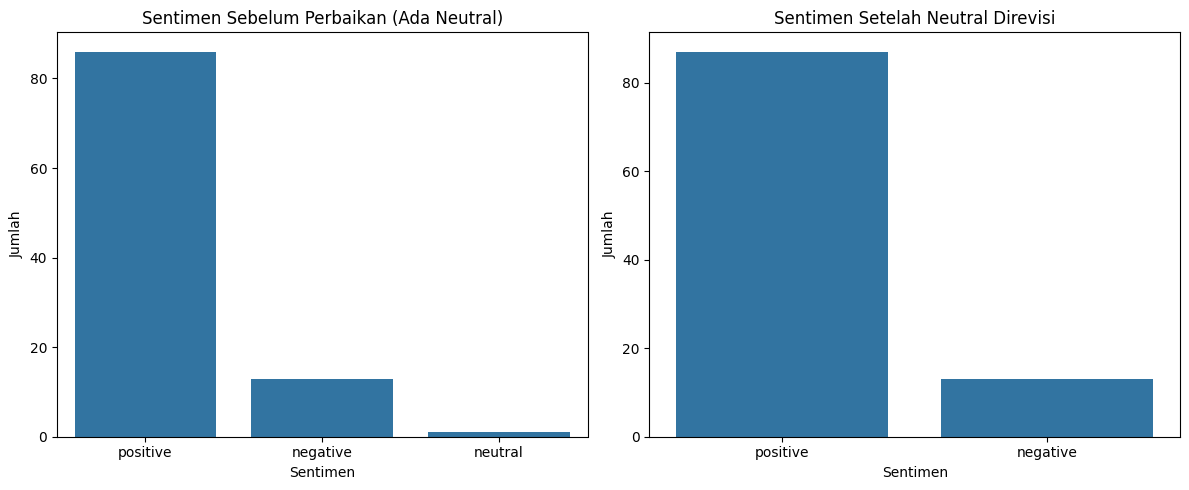

In [ ]:


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x=df_ktt["sentiment_final"])
plt.title("Sentimen Sebelum Perbaikan (Ada Neutral)")
plt.xlabel("Sentimen")
plt.ylabel("Jumlah")

plt.subplot(1, 2, 2)
sns.countplot(x=df_ktt["sentiment_fix"])
plt.title("Sentimen Setelah Neutral Direvisi")
plt.xlabel("Sentimen")
plt.ylabel("Jumlah")

plt.tight_layout()
plt.show()


Di grafik pertama, terdapat tiga kelas sentimen: positif, netral, dan negatif. Mayoritas review jatuh ke kategori positif, sedangkan negatif hanya sebagian kecil. Setelah kategori netral dihilangkan, distribusinya menjadi lebih sederhana—hanya positif dan negatif—dan terlihat bahwa sentimen positif semakin mendominasi. Ini menunjukkan bahwa mayoritas pengalaman pengguna terhadap kampus cenderung baik, dan keluhan relatif sedikit.

In [ ]:
def map_rating_to_sentiment(r):
    if r in ["5 bintang", "4 bintang"]:
        return "positive"
    elif r == "3 bintang":
        return "neutral"
    else:
        return "negative"

df_ktt['rating_label'] = df_ktt['Rating'].apply(map_rating_to_sentiment)
df_ktt[['Rating', 'rating_label']].head(25)

,Rating,rating_label
0,5 bintang,positive
1,5 bintang,positive
2,1 bintang,negative
3,5 bintang,positive
4,5 bintang,positive
5,5 bintang,positive
6,5 bintang,positive
7,1 bintang,negative
8,1 bintang,negative
9,1 bintang,negative


Karena dataset hasil scrapping tidak memiliki label sentimen asli, saya menggunakan rating sebagai proxy label, yaitu label pengganti yang dibentuk dari informasi lain. Rating 4–5 dianggap positif, 3 dianggap netral, dan 1–2 dianggap negatif. Proxy label ini digunakan hanya untuk evaluasi hasil lexicon melalui confusion matrix, bukan untuk menentukan sentimen lexicon itu sendiri.

In [ ]:
# Drop data rating 3 (neutral) dari evaluasi
df_eval = df_ktt[df_ktt['rating_label'] != "neutral"]

# Ambil label sebenarnya dan prediksi final
y_true = df_eval['rating_label']
y_pred = df_eval['sentiment_fix']  # yang sudah tidak punya kelas neutral

# Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred))

[[12  0]
 [ 0 86]]
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00        12
    positive       1.00      1.00      1.00        86

    accuracy                           1.00        98
   macro avg       1.00      1.00      1.00        98
weighted avg       1.00      1.00      1.00        98



Karena metode lexicon yang digunakan menghasilkan dua kelas akhir (positif dan negatif), maka proses evaluasi perlu menyamakan struktur label. Rating 3 bintang yang semula dijadikan proxy untuk kelas netral tidak dapat dibandingkan secara langsung dengan model dua-kelas. Oleh karena itu, data dengan rating 3 dikeluarkan dari proses evaluasi agar label ground truth selaras dengan label prediksi. Pendekatan ini umum digunakan dalam penelitian ketika terjadi perbedaan jumlah kelas antara label proxy dan hasil model.

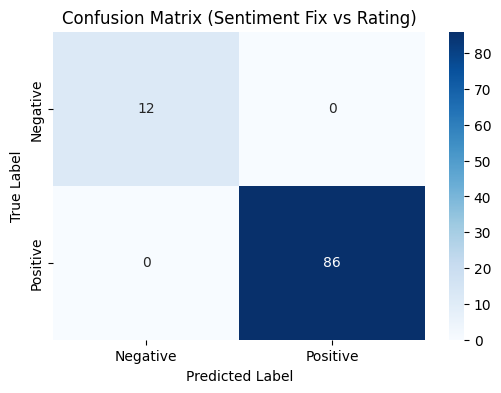

In [ ]:

# ambil y_true dan y_pred
y_true = df_ktt[df_ktt["sentiment_fix"].isin(["positive", "negative"])]["rating_label"]
y_pred = df_ktt[df_ktt["sentiment_fix"].isin(["positive", "negative"])]["sentiment_fix"]

# hitung confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=["negative", "positive"])

# plot
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"])
plt.title("Confusion Matrix (Sentiment Fix vs Rating)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Hasil evaluasi menunjukkan bahwa lexicon mampu mengklasifikasikan semua review sesuai dengan label rating bintang tanpa ada kesalahan. Semua review positif terprediksi positif, semua review negatif terprediksi negatif. Hal ini menghasilkan nilai precision, recall, dan f1-score sebesar 1.00 untuk seluruh kelas

## Kampus 2 Lidah Wetan

In [ ]:
# evaluasi distribusi sentiment

df_lw["sentiment_final"].value_counts()
df_lw["sentiment_final"].value_counts(normalize=True) * 100


,proportion
sentiment_final,
positive,84.0
negative,12.0
neutral,4.0


In [ ]:
# evaluasi distribusi sentiment

df_lw["sentiment_fix"].value_counts()
df_lw["sentiment_fix"].value_counts(normalize=True) * 100

,proportion
sentiment_fix,
positive,88.0
negative,12.0


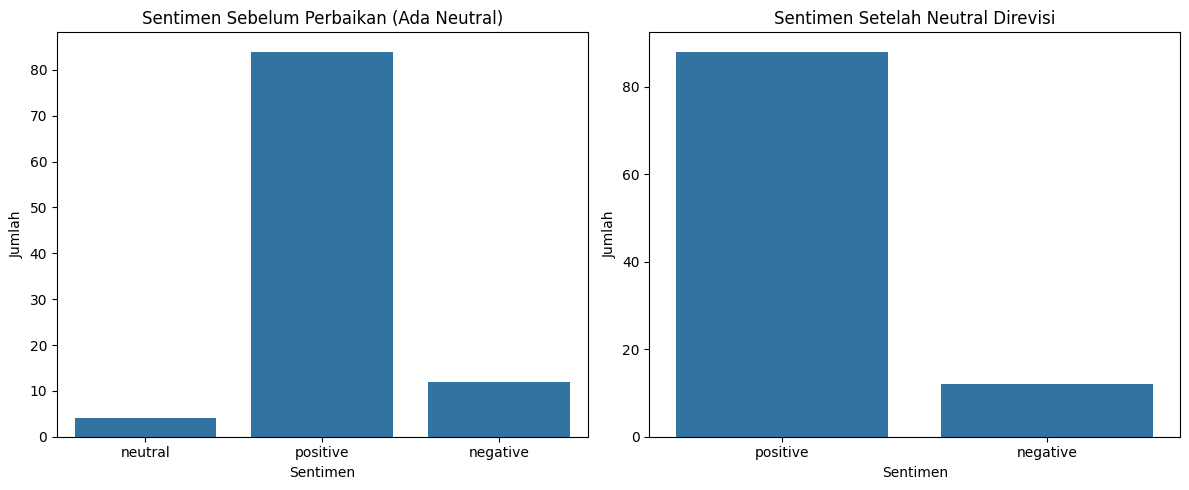

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x=df_lw["sentiment_final"])
plt.title("Sentimen Sebelum Perbaikan (Ada Neutral)")
plt.xlabel("Sentimen")
plt.ylabel("Jumlah")

plt.subplot(1, 2, 2)
sns.countplot(x=df_lw["sentiment_fix"])
plt.title("Sentimen Setelah Neutral Direvisi")
plt.xlabel("Sentimen")
plt.ylabel("Jumlah")

plt.tight_layout()
plt.show()


Berdasarkan visualisasi dapat disimpulkan bahwa mayoritas review memiliki sentimen positif. Hal ini menunjukkan bahwa pengalaman pengguna terhadap kampus tersebut cenderung baik. Sentimen negatif dan netral jumlahnya jauh lebih sedikit, yang berarti keluhan atau komentar campuran tidak terlalu dominan.

In [ ]:
def map_rating_to_sentiment(r):
    if r in ["5 bintang", "4 bintang"]:
        return "positive"
    elif r == "3 bintang":
        return "neutral"
    else:
        return "negative"

df_lw['rating_label'] = df_lw['Rating'].apply(map_rating_to_sentiment)
df_lw[['Rating', 'rating_label']].head(50)

,Rating,rating_label
0,3 bintang,neutral
1,5 bintang,positive
2,5 bintang,positive
3,5 bintang,positive
4,1 bintang,negative
5,5 bintang,positive
6,5 bintang,positive
7,3 bintang,neutral
8,5 bintang,positive
9,5 bintang,positive


Karena dataset hasil scrapping tidak memiliki label sentimen asli, saya menggunakan rating bintang sebagai proxy label. Proxy label adalah label pengganti yang dibuat dari informasi lain untuk keperluan evaluasi. Di sini, rating 4–5 saya anggap sebagai sentimen positif, 3 sebagai netral, dan 1–2 sebagai negatif. Dengan proxy label ini, saya bisa mengevaluasi hasil lexicon menggunakan confusion matrix

In [ ]:
# Drop data rating 3 (neutral) dari evaluasi
df_eval = df_lw[df_lw['rating_label'] != "neutral"]

# Ambil label sebenarnya dan prediksi final
y_true = df_eval['rating_label']
y_pred = df_eval['sentiment_fix']  # yang sudah tidak punya kelas neutral

# Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred))

[[12  0]
 [ 0 83]]
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00        12
    positive       1.00      1.00      1.00        83

    accuracy                           1.00        95
   macro avg       1.00      1.00      1.00        95
weighted avg       1.00      1.00      1.00        95



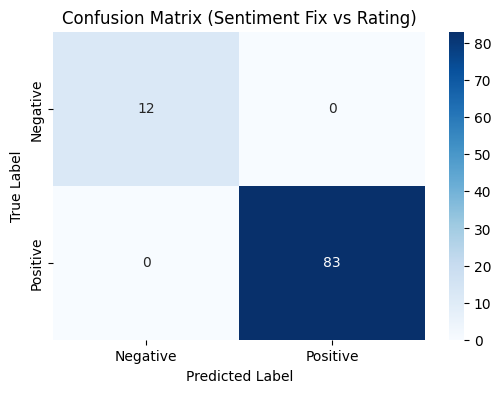

In [ ]:


# ambil y_true dan y_pred
y_true = df_lw[df_lw["sentiment_fix"].isin(["positive", "negative"])]["rating_label"]
y_pred = df_lw[df_lw["sentiment_fix"].isin(["positive", "negative"])]["sentiment_fix"]

# hitung confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=["negative", "positive"])

# plot
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"])
plt.title("Confusion Matrix (Sentiment Fix vs Rating)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Karena metode lexicon yang digunakan menghasilkan dua kelas akhir (positif dan negatif), maka proses evaluasi perlu menyamakan struktur label. Rating 3 bintang yang semula dijadikan proxy untuk kelas netral tidak dapat dibandingkan secara langsung dengan model dua-kelas. Oleh karena itu, data dengan rating 3 dikeluarkan dari proses evaluasi agar label ground truth selaras dengan label prediksi. Pendekatan ini umum digunakan dalam penelitian ketika terjadi perbedaan jumlah kelas antara label proxy dan hasil model.

Nilai precision, recall, dan F1-score yang sempurna pada kedua kelas menunjukkan bahwa pemetaan sentimen menjadi lebih jelas dan tidak ambigu setelah kelas netral dihilangkan. Selain itu, distribusi kelas menjadi lebih terstruktur, sehingga model tidak lagi mengalami masalah bias seperti pada percobaan sebelumnya.

Akurasi keseluruhan mencapai 100%, yang berarti model mampu memprediksi seluruh review dengan benar. Berbeda dengan eksperimen awal, akurasi ini lebih dapat dipercaya, karena model tidak lagi mengabaikan satu atau dua kelas akibat ketidakseimbangan data atau ketidakjelasan kategori sentimen.

# Visualisasi

## Kampus 1 Ketintang



### WordCloud

In [ ]:
# Fungsi WordCloud
def wordcloud(df, sentiment_label):
    text = " ".join(df_ktt[df_ktt['sentiment_fix'] == sentiment_label]['review_clean'])

    wc = WordCloud(width=800,
                   height=400,
                   background_color='white',
                   collocations=False).generate(text)

    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Wordcloud - {sentiment_label.capitalize()}", fontsize=16)
    plt.show()


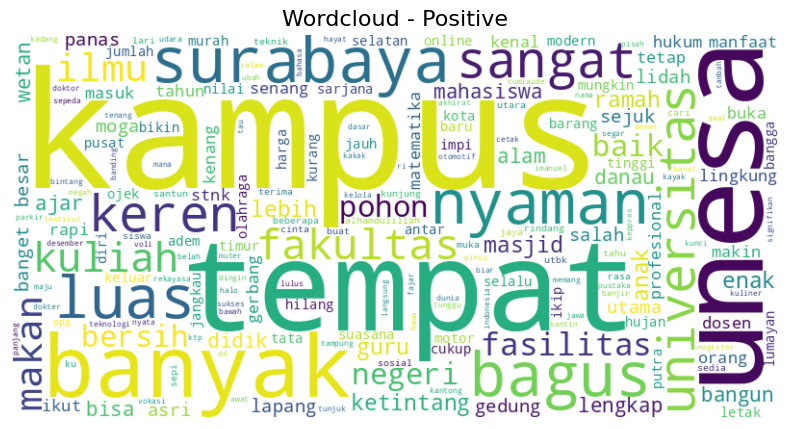

In [ ]:
wordcloud(df_ktt, 'positive')

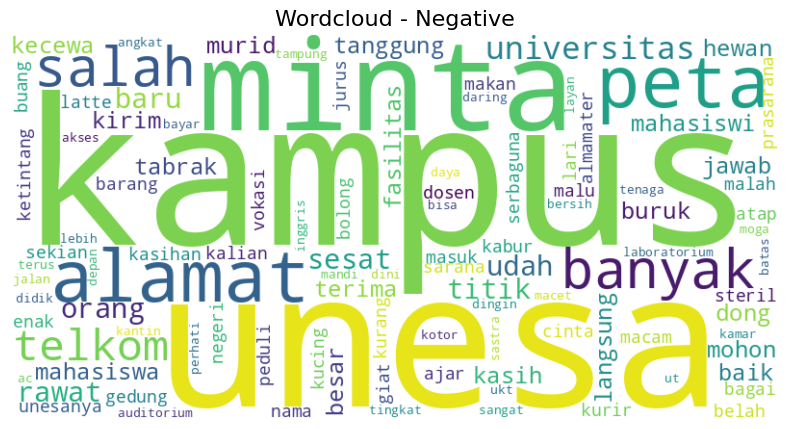

In [ ]:
wordcloud(df_ktt, 'negative')

### Kata yang Paling Sering Muncul

In [ ]:
# Fungsi Bar Kata yang Sering Muncul
def plot_top_words(df, sentiment_label, n=15):
    subset = df[df['sentiment_fix'] == sentiment_label]

    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(subset['review_clean'])

    word_counts = X.sum(axis=0).A1
    vocab = vectorizer.get_feature_names_out()

    freq_df = pd.DataFrame({"word": vocab, "count": word_counts})
    freq_df = freq_df.sort_values(by="count", ascending=False).head(n)

    plt.figure(figsize=(10,5))
    plt.barh(freq_df['word'], freq_df['count'])
    plt.gca().invert_yaxis()
    plt.title(f"Top {n} Words - {sentiment_label.capitalize()}", fontsize=16)
    plt.xlabel("Frequency")
    plt.show()


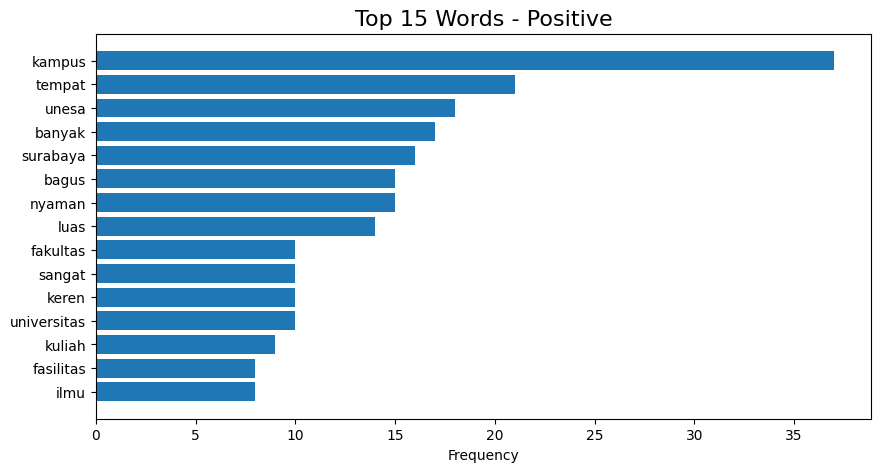

In [ ]:
plot_top_words(df_ktt, 'positive')

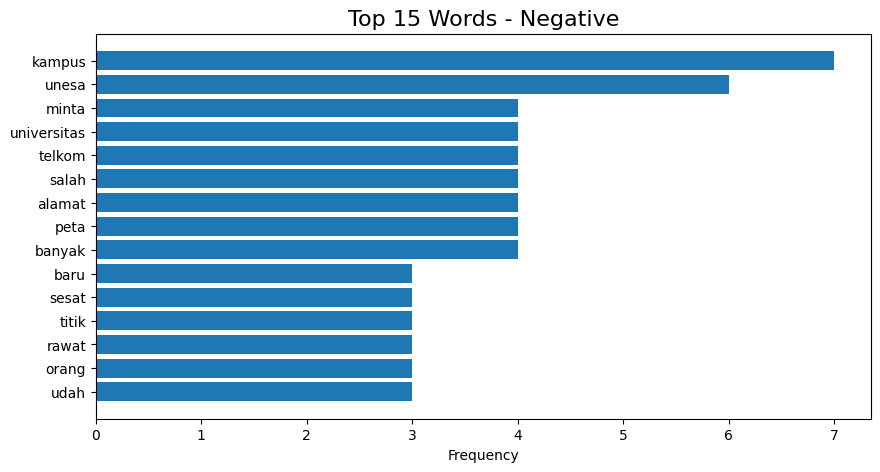

In [ ]:
plot_top_words(df_ktt, 'negative')

## Kampus 2

### WordCloud

In [ ]:
# Fungsi WordCloud
def wordcloud2(df, sentiment_label):
    text = " ".join(df_lw[df_lw['sentiment_fix'] == sentiment_label]['review_clean_lw'])

    wc = WordCloud(width=800,
                   height=400,
                   background_color='white',
                   collocations=False).generate(text)

    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Wordcloud - {sentiment_label.capitalize()}", fontsize=16)
    plt.show()


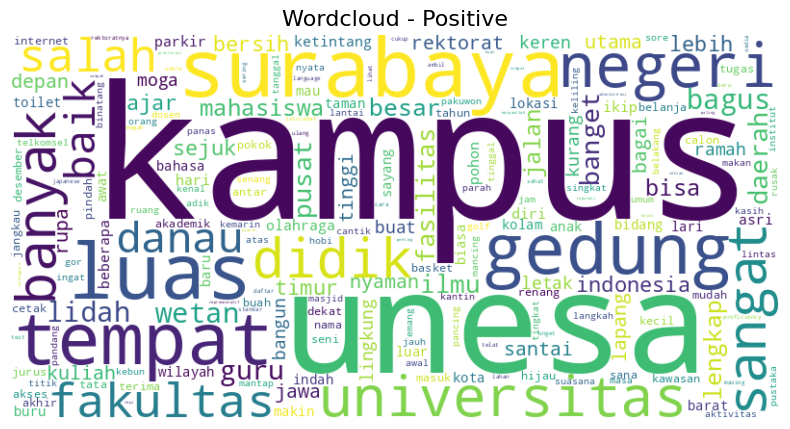

In [ ]:
wordcloud2(df_lw, 'positive')

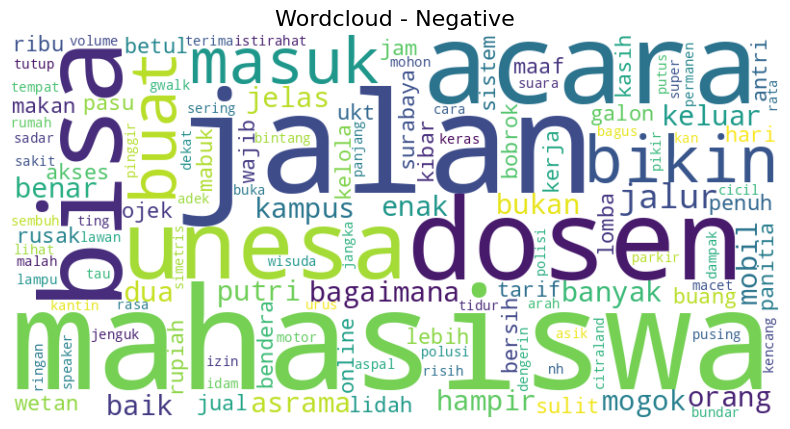

In [ ]:
wordcloud2(df_lw, 'negative')

### Kata yang Paling Sering Muncul

In [ ]:
# Fungsi Bar Kata yang Sering Muncul
def plot_top_words2(df, sentiment_label, n=15):
    subset = df[df['sentiment_fix'] == sentiment_label]

    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(subset['review_clean_lw'])

    word_counts = X.sum(axis=0).A1
    vocab = vectorizer.get_feature_names_out()

    freq_df = pd.DataFrame({"word": vocab, "count": word_counts})
    freq_df = freq_df.sort_values(by="count", ascending=False).head(n)

    plt.figure(figsize=(10,5))
    plt.barh(freq_df['word'], freq_df['count'])
    plt.gca().invert_yaxis()
    plt.title(f"Top {n} Words - {sentiment_label.capitalize()}", fontsize=16)
    plt.xlabel("Frequency")
    plt.show()


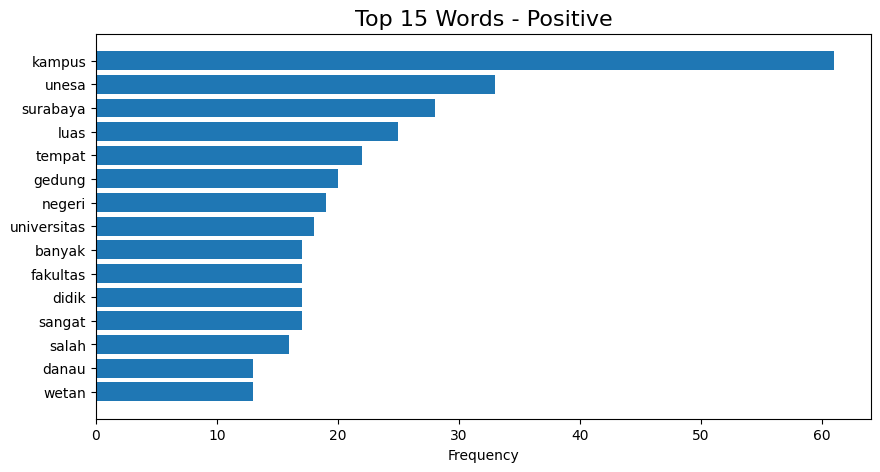

In [ ]:
plot_top_words2(df_lw, 'positive')

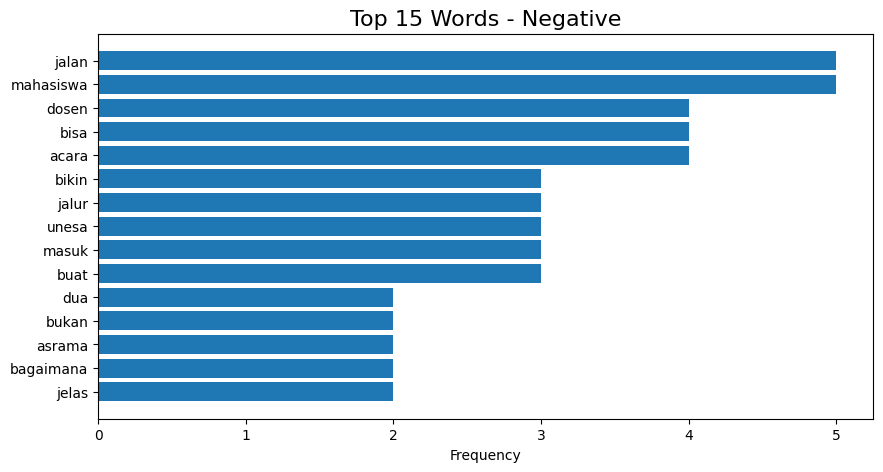

In [ ]:
plot_top_words2(df_lw, 'negative')